In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import koreanize_matplotlib

In [4]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
# 날짜는 파이썬 표준 라이브러리 datetime 사용
import datetime
# 오늘 날짜 가져오기
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today

'2024-12-19'

In [7]:
file_name = f'etf_{today}.csv'
file_name

'etf_2024-12-19.csv'

In [8]:
df_etfs = pd.read_csv(file_name)

In [9]:
df_etfs.shape

(930, 12)

In [10]:
df_etfs.head()

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1057560,2,300,0.03,"1,057,346.00",0.84,289552,306219,95099
1,357870,6,TIGER CD금리투자KIS(합성),55425,2,15,0.03,"55,424.00",0.82,218161,12090,68508
2,360750,4,TIGER 미국S&P500,21195,5,-465,-2.15,"21,193.00",17.14,4928789,104522,64136
3,069500,1,KODEX 200,32330,5,-750,-2.27,"32,414.00",-3.76,3830187,123991,55462
4,423160,6,KODEX KOFR금리액티브(합성),108975,2,15,0.01,"108,965.00",0.83,44974,4900,43609


In [11]:
df_etfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       930 non-null    object 
 1   Category     930 non-null    int64  
 2   Name         930 non-null    object 
 3   Price        930 non-null    int64  
 4   RiseFall     930 non-null    int64  
 5   Change       930 non-null    int64  
 6   ChangeRate   930 non-null    float64
 7   NAV          930 non-null    float64
 8   EarningRate  870 non-null    float64
 9   Volume       930 non-null    int64  
 10  Amount       930 non-null    int64  
 11  MarCap       930 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 87.3+ KB


In [12]:
# 거래량 상위 10개
df_etfs.sort_values('Volume', ascending=False).head(10)

# 등락율 기준 상위 10개

# 거래량 상위 10개
df_etfs.sort_values('ChangeRate', ascending=False).head(10)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
476,252420,3,RISE 200선물인버스2X,2550,2,125,5.15,"2,552.00",7.54,140443,357,235
27,252670,3,KODEX 200선물인버스2X,2545,2,120,4.95,"2,543.00",7.06,116745361,295840,12610
721,253160,3,PLUS 200선물인버스2X,5195,2,245,4.95,"5,197.00",7.14,22073,114,78
286,252710,3,TIGER 200선물인버스2X,2695,2,125,4.86,"2,693.00",7.31,3187252,8557,768
749,253230,3,KOSEF 200선물인버스2X,2555,2,115,4.71,"2,552.00",7.49,120274,306,72
673,491630,4,RISE 미국반도체인버스(합성 H),20800,2,830,4.16,"20,936.00",NaN,2629,54,94
518,409810,4,KODEX 미국나스닥100선물인버스(H),7620,2,275,3.74,"7,613.00",-10.92,334000,2537,187
689,415760,4,SOL 차이나육성산업액티브(합성),7900,2,245,3.20,"7,976.00",58.49,5189,39,87
692,225030,4,TIGER 미국S&P500선물인버스(H),2945,2,85,2.97,"2,950.00",-6.84,120868,356,85
858,291620,3,KOSEF 코스닥150선물인버스,7470,2,205,2.82,"7,477.00",4.31,9793,73,47


In [13]:
# 파생열 추가 CategoryName
# df_etfs['CategoryName'] = df_etfs['Category']

In [14]:
# 파생열 추가 CategoryName
df_etfs['CategoryName'] = df_etfs['Category']

# Category코드를 코드명으로 변경
# 1. 국내 시장지수 2. 국내 업종/테마 3. 국내파생 4. 해외주식 5. 원자재 6. 채권 7. 기타
category_decode = ['국내 시장지수','국내 업종/테마' ,'국내파생' ,'해외주식','원자재','채권','기타']
df_etfs['CategoryName'] = df_etfs['CategoryName'].replace([i+1 for i in range(7)],category_decode)

In [15]:
df_etfs.head(5)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,CategoryName
0,459580,6,KODEX CD금리액티브(합성),1057560,2,300,0.03,"1,057,346.00",0.84,289552,306219,95099,채권
1,357870,6,TIGER CD금리투자KIS(합성),55425,2,15,0.03,"55,424.00",0.82,218161,12090,68508,채권
2,360750,4,TIGER 미국S&P500,21195,5,-465,-2.15,"21,193.00",17.14,4928789,104522,64136,해외주식
3,069500,1,KODEX 200,32330,5,-750,-2.27,"32,414.00",-3.76,3830187,123991,55462,국내 시장지수
4,423160,6,KODEX KOFR금리액티브(합성),108975,2,15,0.01,"108,965.00",0.83,44974,4900,43609,채권


In [16]:
df_etfs.columns.tolist()

['Symbol',
 'Category',
 'Name',
 'Price',
 'RiseFall',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap',
 'CategoryName']

In [17]:
columns = ['Symbol',
 'Category',
 'CategoryName',
 'Name',
 'Price',
 'RiseFall',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap'
 ]

In [18]:
df_etfs

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,CategoryName
0,459580,6,KODEX CD금리액티브(합성),1057560,2,300,0.03,"1,057,346.00",0.84,289552,306219,95099,채권
1,357870,6,TIGER CD금리투자KIS(합성),55425,2,15,0.03,"55,424.00",0.82,218161,12090,68508,채권
2,360750,4,TIGER 미국S&P500,21195,5,-465,-2.15,"21,193.00",17.14,4928789,104522,64136,해외주식
3,069500,1,KODEX 200,32330,5,-750,-2.27,"32,414.00",-3.76,3830187,123991,55462,국내 시장지수
4,423160,6,KODEX KOFR금리액티브(합성),108975,2,15,0.01,"108,965.00",0.83,44974,4900,43609,채권
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,407300,2,HANARO Fn골프테마,5260,5,-30,-0.57,"5,254.00",-7.84,60,0,16,국내 업종/테마
926,412560,2,TIGER BBIG레버리지,1951,5,-144,-6.87,"1,948.00",-1.18,47674,93,16,국내 업종/테마
927,227550,2,TIGER 200 산업재,6445,5,-60,-0.92,"6,457.00",-3.70,126,0,15,국내 업종/테마
928,429990,7,SOL 한국형글로벌플랫폼&메타버스액티브,16440,5,-390,-2.32,"16,424.00",29.41,23,0,10,기타


### 파생열 추가하기

#### 1) 카테고리명

In [19]:
columns = ['Symbol','Category','CategoryName','Name','Price','RiseFall','Change','ChangeRate','NAV','EarningRate','Volume','Amount','MarCap']

# case1) 열 재배치
df_etfs = df_etfs[columns]

# case2) reindex 메소드 사용
# df_etfs = df_etfs.reindex(columns = columns)

# case3) insert('삽입위치','열이름', 값) 메소드
# df_etfs.insert(2, 'CategoryName',df_etfs.pop('CategoryName'))
df_etfs

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,채권,KODEX CD금리액티브(합성),1057560,2,300,0.03,"1,057,346.00",0.84,289552,306219,95099
1,357870,6,채권,TIGER CD금리투자KIS(합성),55425,2,15,0.03,"55,424.00",0.82,218161,12090,68508
2,360750,4,해외주식,TIGER 미국S&P500,21195,5,-465,-2.15,"21,193.00",17.14,4928789,104522,64136
3,069500,1,국내 시장지수,KODEX 200,32330,5,-750,-2.27,"32,414.00",-3.76,3830187,123991,55462
4,423160,6,채권,KODEX KOFR금리액티브(합성),108975,2,15,0.01,"108,965.00",0.83,44974,4900,43609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,407300,2,국내 업종/테마,HANARO Fn골프테마,5260,5,-30,-0.57,"5,254.00",-7.84,60,0,16
926,412560,2,국내 업종/테마,TIGER BBIG레버리지,1951,5,-144,-6.87,"1,948.00",-1.18,47674,93,16
927,227550,2,국내 업종/테마,TIGER 200 산업재,6445,5,-60,-0.92,"6,457.00",-3.70,126,0,15
928,429990,7,기타,SOL 한국형글로벌플랫폼&메타버스액티브,16440,5,-390,-2.32,"16,424.00",29.41,23,0,10


In [20]:
df_etfs['Name']

0          KODEX CD금리액티브(합성)
1        TIGER CD금리투자KIS(합성)
2             TIGER 미국S&P500
3                  KODEX 200
4        KODEX KOFR금리액티브(합성)
               ...          
925            HANARO Fn골프테마
926           TIGER BBIG레버리지
927            TIGER 200 산업재
928    SOL 한국형글로벌플랫폼&메타버스액티브
929              RISE 창업투자회사
Name: Name, Length: 930, dtype: object

#### 2) 브랜드명

In [21]:
# df_etfs['Name'].str.split(' ').str[0]
df_etfs['Brand'] = df_etfs['Name'].str.split(' ').map(lambda list:list[0])

C:\Users\hydrl\AppData\Local\Temp\ipykernel_14996\282696345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etfs['Brand'] = df_etfs['Name'].str.split(' ').map(lambda list:list[0])


In [22]:
df_etfs

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
0,459580,6,채권,KODEX CD금리액티브(합성),1057560,2,300,0.03,"1,057,346.00",0.84,289552,306219,95099,KODEX
1,357870,6,채권,TIGER CD금리투자KIS(합성),55425,2,15,0.03,"55,424.00",0.82,218161,12090,68508,TIGER
2,360750,4,해외주식,TIGER 미국S&P500,21195,5,-465,-2.15,"21,193.00",17.14,4928789,104522,64136,TIGER
3,069500,1,국내 시장지수,KODEX 200,32330,5,-750,-2.27,"32,414.00",-3.76,3830187,123991,55462,KODEX
4,423160,6,채권,KODEX KOFR금리액티브(합성),108975,2,15,0.01,"108,965.00",0.83,44974,4900,43609,KODEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,407300,2,국내 업종/테마,HANARO Fn골프테마,5260,5,-30,-0.57,"5,254.00",-7.84,60,0,16,HANARO
926,412560,2,국내 업종/테마,TIGER BBIG레버리지,1951,5,-144,-6.87,"1,948.00",-1.18,47674,93,16,TIGER
927,227550,2,국내 업종/테마,TIGER 200 산업재,6445,5,-60,-0.92,"6,457.00",-3.70,126,0,15,TIGER
928,429990,7,기타,SOL 한국형글로벌플랫폼&메타버스액티브,16440,5,-390,-2.32,"16,424.00",29.41,23,0,10,SOL


In [23]:
# 브랜드별 차지 비중 보기
# df['컬럼명'].value_counts() : 
df_etfs['Brand'].value_counts(normalize=True).map(lambda x:f'{x*100:.2f}%')

Brand
KODEX         21.72%
TIGER         21.51%
RISE          12.69%
ACE            9.46%
PLUS           6.99%
HANARO         5.81%
SOL            5.70%
KOSEF          4.95%
히어로즈           1.61%
TIMEFOLIO      1.40%
WON            1.29%
KoAct          0.97%
1Q             0.86%
에셋플러스          0.86%
BNK            0.54%
파워             0.54%
HK             0.43%
UNICORN        0.43%
마이티            0.32%
마이다스           0.32%
FOCUS          0.32%
KCGI           0.32%
DAISHIN343     0.22%
VITA           0.22%
TRUSTON        0.22%
TREX           0.22%
ITF            0.11%
Name: proportion, dtype: object

Text(0.5, 1.0, '브랜드 비중')

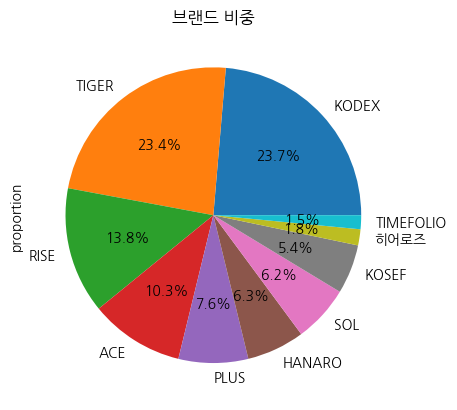

In [24]:
# 상위 10개 pie 그래프
df_etfs['Brand'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('브랜드 비중')

단기적인 시장전망에 따라 투자하세요.

레버리지/인버스에 대해 처음 가장 많이 오해하기 쉬운 것이 장기적으로 투자를 할 경우에도 2배,-1배의 수익률을 얻을 것이라고 기대하는 것입니다. 하지만 이것은 잘못된 생각입니다. 그 이유는 레버리지/인버스 의 운용 목적은 "투자 기간" 동안의 기초지수의 움직임의 2배/-1배가 아닌, 기초지수의 "일간변동률"의 2배 / -1배를 추적하기 때문입니다.

당일 수익률이 반영되면 원금이 변하기 때문에 다음 날 수익률이 반영이 되더라도 원금이 달라진 상태에서 반영이 되므로 누적 수익률은 예상과 다른 결과가 나오게 됩니다.

따라서 레버리지/인버스 투자의 경우 단기적인 시장전망에 따라 매매하는 것이 바람직한 투자전략이 될 수 있습니다.
( 시장의 투자기간이 길수록 누적수익률과 기초지수의 누적수익률의 격차가 발생할 가능성이 높습니다. ) 

In [25]:
# 인버스 상품 가져오기
df_etfs[df_etfs['Name'].str.contains('인버스')].head(3)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
27,252670,3,국내파생,KODEX 200선물인버스2X,2545,2,120,4.95,"2,543.00",7.06,116745361,295840,12610,KODEX
67,114800,3,국내파생,KODEX 인버스,4755,2,115,2.48,"4,755.00",4.39,16651685,79053,5321,KODEX
122,251340,3,국내파생,KODEX 코스닥150선물인버스,4175,2,105,2.58,"4,193.00",4.90,29731918,123978,2417,KODEX


In [26]:
# 주가가 떨어질 경우 오히려 수익을 얻는 펀드를 인버스 펀드나 리버스 펀드라고 합니다.
# 인버스상품과, 아닌것의 비율 구하기
df_etfs['인버스'] = df_etfs['Name'].str.contains('인버스')
df_etfs['인버스'].value_counts(normalize=True)*100

C:\Users\hydrl\AppData\Local\Temp\ipykernel_14996\4208132056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etfs['인버스'] = df_etfs['Name'].str.contains('인버스')


인버스
False   95.27
True     4.73
Name: proportion, dtype: float64

In [27]:
# 레버리지 ETF 선물 등 파생상품에 투자해 지수보다 높은 수익을 추구하는 ETF
# 레버리지 상품과 아닌 상품의 비율 구하기
df_etfs['레버리지'] = df_etfs['Name'].str.contains('레버리지')
df_etfs['레버리지'].value_counts(normalize=True)*100

C:\Users\hydrl\AppData\Local\Temp\ipykernel_14996\1008459407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etfs['레버리지'] = df_etfs['Name'].str.contains('레버리지')


레버리지
False   94.95
True     5.05
Name: proportion, dtype: float64

In [28]:
# 헤지 상품과 아닌 상품의 비율 구하기
df_etfs['헤지'] = df_etfs['Name'].str.endswith('(H)')
df_etfs['헤지'].value_counts(normalize=True)*100

C:\Users\hydrl\AppData\Local\Temp\ipykernel_14996\3158906002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etfs['헤지'] = df_etfs['Name'].str.endswith('(H)')


헤지
False   93.33
True     6.67
Name: proportion, dtype: float64

In [29]:
df_etfs.head()

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
0,459580,6,채권,KODEX CD금리액티브(합성),1057560,2,300,0.03,"1,057,346.00",0.84,289552,306219,95099,KODEX,False,False,False
1,357870,6,채권,TIGER CD금리투자KIS(합성),55425,2,15,0.03,"55,424.00",0.82,218161,12090,68508,TIGER,False,False,False
2,360750,4,해외주식,TIGER 미국S&P500,21195,5,-465,-2.15,"21,193.00",17.14,4928789,104522,64136,TIGER,False,False,False
3,069500,1,국내 시장지수,KODEX 200,32330,5,-750,-2.27,"32,414.00",-3.76,3830187,123991,55462,KODEX,False,False,False
4,423160,6,채권,KODEX KOFR금리액티브(합성),108975,2,15,0.01,"108,965.00",0.83,44974,4900,43609,KODEX,False,False,False


In [30]:
df_etfs[df_etfs['레버리지']]

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
12,122630,3,국내파생,KODEX 레버리지,14160,5,-700,-4.71,"14,229.00",-9.22,19510744,277115,23194,KODEX,False,True,False
21,233740,3,국내파생,KODEX 코스닥150레버리지,6660,5,-355,-5.06,"6,689.00",-14.14,37329421,249370,16583,KODEX,False,True,False
136,423920,4,해외주식,TIGER 미국필라델피아반도체레버리지(합성),23975,5,-2030,-7.81,"24,390.00",25.28,248409,5980,2155,TIGER,False,True,False
155,409820,4,해외주식,KODEX 미국나스닥100레버리지(합성 H),12325,5,-1040,-7.78,"12,376.00",26.38,422193,5220,1849,KODEX,False,True,False
156,462330,2,국내 업종/테마,KODEX 2차전지산업레버리지,1351,5,-58,-4.12,"1,364.00",-42.49,5773134,7765,1836,KODEX,False,True,False
225,418660,4,해외주식,TIGER 미국나스닥100레버리지(합성),26370,5,-1655,-5.91,"26,446.00",49.19,227404,6018,1134,TIGER,False,True,False
248,204480,4,해외주식,TIGER 차이나CSI300레버리지(합성),19515,2,335,1.75,"19,888.00",69.36,21463,414,1007,TIGER,False,True,False
271,465610,4,해외주식,ACE 미국빅테크TOP7 Plus레버리지(합성),29850,5,-1830,-5.78,"29,744.00",68.06,194313,5807,896,ACE,False,True,False
283,452250,6,채권,ACE 미국30년국채선물레버리지(합성 H),5820,5,-235,-3.88,"5,820.00",-19.91,321908,1879,792,ACE,False,True,False
291,267770,3,국내파생,TIGER 200선물레버리지,10830,5,-525,-4.62,"10,815.00",-9.41,141976,1539,736,TIGER,False,True,False


In [31]:
new_file_name = f'new_etf_{today}.csv'
new_file_name

'new_etf_2024-12-19.csv'

In [32]:
df_etfs.to_csv(new_file_name, index=False)